# <span style='color:maroon'>SALES INSIGHT CASE STUDY GROUP 3 SOLUTION</span>


#### We need to answer the following questions using the data provided:<br>
<span style='color:purple'>
    
* What was the best month for sales? How much was earned that month? 

* What city sold the most products?

* What time should we display advertisemens to maximize the likelihood of customer’s buying a product?

* What products are most often sold together?

* What product sold the most? Why do you think it sold the most?
***
</span>

* **Since we have multiple data files and we need to analyse them together in order to answer the questions, the first thing done was to read and merge all data files into one dataframe.**
* **From the merged dataframe, we can see that there are a number of missing values. It is necessary to get rid of these so the analysis can be done without a hitch**
* **Looking further at the dataframe, it showed that there were more cells whose values didn't make sense. Their values were exactly the same as the column name. Those ones would also dropped from the data frame.**
* **On checking the information of the dataframe, it can be seen that all columns are listed as object, whereas some contain numerical data and dates. The datatypes would need to be changed in order to effectively perform operations on them.**
* **Our approach is to add columns**
* **The first thing is to add new columns for data that is needed but is not explicitly listed in the dataframe. From the data, it can be seen that there is an `Order Date` column. In order to effectively check the total sales by month, it would be best for there to be a new `Month`column**
* **In that sense, it would be most effective to have a column that states the total sales per Order, rather than just having a `Quantity` and `Price Each` column separately. This way, the data can be grouped by the `Month` and the `Total Sales` can be summed to get the total sales per month**
* **Equally, a `city` column separate from the address column is needed to tackle the second question. We can then sum all `Quantity Ordered` by the city**
* **To tackle the third question, it would be nice to add an `Hour` column separately from the `Order Date` column to group the data by the `Hour` and sum the `Quantity Ordered`to know around which time customers were buying products more frequently**
* **For the fourth problem, when products are bought together by the same customer, they will have the same `Order ID`. We can check for duplicated Order IDs and simply concatenate the products for those IDs together. Then all we need to do is count by the concatenated products**
* **Finally for the last problem, it is more straightforward. We just need to group by `Product` and sum all `quantity ordered`.**
* **Afterwards, we can display all this data in charts to further illustrate the results gotten**

#### Import Necessary Libraries

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches

## <span style = 'color:violet'>Reading all the .csv files and merging into one DataFrame</span>

#### Getting all file paths in a list

***

In [2]:
folder_path = "./Sales_Data/"
path_list = os.listdir(folder_path)
file_paths = []
for filename in path_list:
    if filename.endswith(".csv"):
        file_paths.append(folder_path + filename)
file_paths

['./Sales_Data/Sales_April_2019.csv',
 './Sales_Data/Sales_August_2019.csv',
 './Sales_Data/Sales_December_2019.csv',
 './Sales_Data/Sales_February_2019.csv',
 './Sales_Data/Sales_January_2019.csv',
 './Sales_Data/Sales_July_2019.csv',
 './Sales_Data/Sales_June_2019.csv',
 './Sales_Data/Sales_March_2019.csv',
 './Sales_Data/Sales_May_2019.csv',
 './Sales_Data/Sales_November_2019.csv',
 './Sales_Data/Sales_October_2019.csv',
 './Sales_Data/Sales_September_2019.csv']

#### reading all the files and merging the resulting dataframes into one dataframe

In [3]:
data = pd.concat(
    map(pd.read_csv, file_paths), ignore_index=True)
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


# <span style = 'color:violet'>Cleaning The Data</span>


#### Checking for empty values and getting rid of them

In [4]:
data.isna()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,False,False,False,False,False,False
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
186845,False,False,False,False,False,False
186846,False,False,False,False,False,False
186847,False,False,False,False,False,False
186848,False,False,False,False,False,False


In [5]:
data = data.dropna().reset_index(drop=True)
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186300,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186301,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186302,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186303,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


***
We noticed that some of the rows don't contain proper values but instead contain the series name as their "value"

as in:
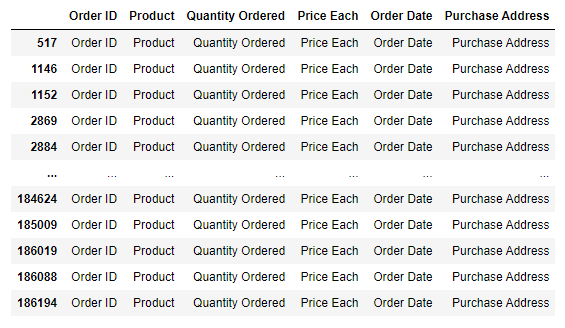:

We need to get rid of those series as well
We went about this by simply extracting all the rows whose cell values were not the same as the series' name
*******

In [6]:
data[data["Order ID"] == "Order ID"]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
517,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1146,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1152,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2869,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2884,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
184624,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185009,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186019,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186088,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [7]:
data = data[data["Order ID"] != "Order ID"].reset_index(drop=True)
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
185945,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
185946,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
185947,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
185948,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


# <span style = 'color:violet'>Checking Columns are of the Right Data Type and Changing Accordingly</span>


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
dtypes: object(6)
memory usage: 8.5+ MB


In [9]:
data["Order ID"] = pd.to_numeric(data["Order ID"])
data["Quantity Ordered"] = pd.to_numeric(data["Quantity Ordered"])
data["Price Each"] = pd.to_numeric(data["Price Each"])
data["Order Date"] = pd.to_datetime(data["Order Date"])

**<span style = 'color:purple'>Now if the dataframe info is checked again, it can be seen that all columns have been formatted accordingly</span>**

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  int64         
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 8.5+ MB


***
# <span style = 'color:violet'>Adding Necessary New Columns</span>


#### Adding a `Month` Column

In [11]:
data["Month"] = data["Order Date"].dt.strftime("%B")
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April
...,...,...,...,...,...,...,...
185945,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",September
185946,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",September
185947,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",September
185948,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",September


#### Adding a `City` Column

In [12]:
data['City'] = data["Purchase Address"].str.split(", ").str[1]
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,Dallas
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,Boston
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,Los Angeles
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,Los Angeles
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,Los Angeles
...,...,...,...,...,...,...,...,...
185945,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",September,Los Angeles
185946,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",September,San Francisco
185947,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",September,San Francisco
185948,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",September,San Francisco


**Adding a `Hour` Column**

In [13]:
data["Hour"] = data["Order Date"].dt.strftime("%H:00 %p")
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,Dallas,08:00 AM
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,Boston,22:00 PM
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,Los Angeles,14:00 PM
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,Los Angeles,14:00 PM
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,Los Angeles,09:00 AM
...,...,...,...,...,...,...,...,...,...
185945,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",September,Los Angeles,20:00 PM
185946,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",September,San Francisco,16:00 PM
185947,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",September,San Francisco,07:00 AM
185948,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",September,San Francisco,17:00 PM


#### Adding a `Sales` Column

In [14]:
data["Sales"] = data["Quantity Ordered"] * data["Price Each"]
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Hour,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,Dallas,08:00 AM,23.90
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,Boston,22:00 PM,99.99
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,Los Angeles,14:00 PM,600.00
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,Los Angeles,14:00 PM,11.99
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,Los Angeles,09:00 AM,11.99
...,...,...,...,...,...,...,...,...,...,...
185945,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",September,Los Angeles,20:00 PM,8.97
185946,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",September,San Francisco,16:00 PM,700.00
185947,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",September,San Francisco,07:00 AM,700.00
185948,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",September,San Francisco,17:00 PM,379.99


# <span style = 'color:violet'> Solving Question 1</span>

#### Creating a new dataframe with only `Month` and `Sales` Columns

In [15]:
sales_per_month = data[["Month", "Sales"]]
sales_per_month

,Month,Sales
0,April,23.90
1,April,99.99
2,April,600.00
3,April,11.99
4,April,11.99
...,...,...
185945,September,8.97
185946,September,700.00
185947,September,700.00
185948,September,379.99


#### Gettting the total sales ordered by month

In [16]:
sales_per_month = sales_per_month.groupby("Month", as_index=False).sum()
sales_per_month = sales_per_month.sort_values('Month', key = lambda x : pd.to_datetime(x, format='%B').dt.month).reset_index(drop=True)
sales_per_month

,Month,Sales
0,January,1822256.73
1,February,2202022.42
2,March,2807100.38
3,April,3390670.24
4,May,3152606.75
5,June,2577802.26
6,July,2647775.76
7,August,2244467.88
8,September,2097560.13
9,October,3736726.88


#### Constructing a bar chart to show the data

C:\Users\USER\AppData\Local\Temp\ipykernel_4148\335239846.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(labels=sales_per_month["Month"], rotation=-45, ha='left')


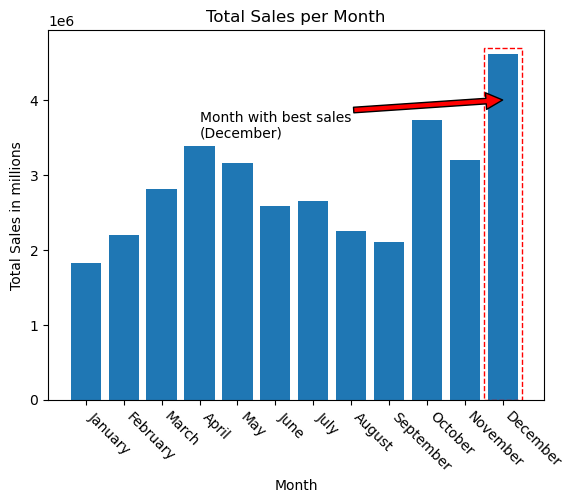

In [17]:
#plt.xticks(rotation=-45, ha="left")

fig = plt.figure()

chart = fig.add_subplot(111)
chart.bar(sales_per_month["Month"], sales_per_month["Sales"])

chart.add_patch(
    patches.Rectangle(
        xy=(10.5, 0),  # point of origin.
        width=1, height=4700000, linewidth=1,
        color='red', fill=False, linestyle='--'))
chart.set_title("Total Sales per Month")
chart.set_xlabel("Month")
chart.set_ylabel("Total Sales in millions")
chart.set_xticklabels(labels=sales_per_month["Month"], rotation=-45, ha='left')
chart.annotate(f'Month with best sales\n(December)', xy=(11, 4000000), xytext=(3, 3500000),
             arrowprops=dict(facecolor='red'),
             )
plt.show()

# <span style = 'color:violet'>Solving Question 2</span>


#### **Creating a new dataframe with only `City` and `Quantity Ordered` columns**

In [18]:
most_selling_city = data[["City", "Quantity Ordered"]]
most_selling_city

,City,Quantity Ordered
0,Dallas,2
1,Boston,1
2,Los Angeles,1
3,Los Angeles,1
4,Los Angeles,1
...,...,...
185945,Los Angeles,3
185946,San Francisco,1
185947,San Francisco,1
185948,San Francisco,1


#### Grouping based on city and getting sum of products sold for each

In [19]:
most_selling_city = most_selling_city.groupby("City", as_index=False).sum()
most_selling_city

,City,Quantity Ordered
0,Atlanta,16602
1,Austin,11153
2,Boston,22528
3,Dallas,16730
4,Los Angeles,33289
5,New York City,27932
6,Portland,14053
7,San Francisco,50239
8,Seattle,16553


#### Constructing a bar chart to show products sold by city

C:\Users\USER\AppData\Local\Temp\ipykernel_4148\4219996622.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(labels=most_selling_city["City"], rotation=-45, ha='left')


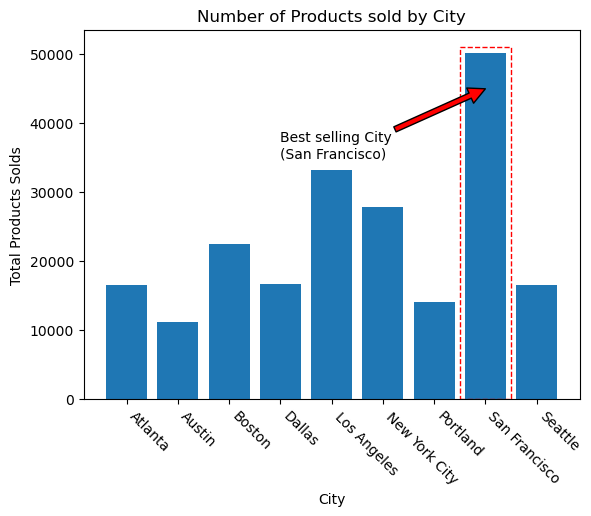

In [20]:
#plt.xticks(rotation=-45, ha="left")

fig = plt.figure()

chart = fig.add_subplot(111)
chart.bar(most_selling_city["City"], most_selling_city["Quantity Ordered"])

chart.add_patch(
    patches.Rectangle(
        xy=(6.5, 0),  # point of origin.
        width=1, height=51000, linewidth=1,
        color='red', fill=False, linestyle='--'))
chart.set_title("Number of Products sold by City")
chart.set_xlabel("City")
chart.set_ylabel("Total Products Solds")
chart.set_xticklabels(labels=most_selling_city["City"], rotation=-45, ha='left')
chart.annotate(f'Best selling City\n(San Francisco)', xy=(7, 45000), xytext=(3, 35000),
             arrowprops=dict(facecolor='red'),
             )
plt.show()

# <span style = 'color:violet'>Solving Question 3</span>


#### **Creating a new dataframe with only `Hour` and `Quantity Ordered` columns**

In [21]:
best_sales_hours = data[["Hour", "Quantity Ordered"]]
best_sales_hours

,Hour,Quantity Ordered
0,08:00 AM,2
1,22:00 PM,1
2,14:00 PM,1
3,14:00 PM,1
4,09:00 AM,1
...,...,...
185945,20:00 PM,3
185946,16:00 PM,1
185947,07:00 AM,1
185948,17:00 PM,1


#### **Grouping the data by the hour ordered**

In [22]:
best_sales_hours = best_sales_hours.groupby("Hour", as_index=False).sum()
best_sales_hours

,Hour,Quantity Ordered
0,00:00 AM,4428
1,01:00 AM,2619
2,02:00 AM,1398
3,03:00 AM,928
4,04:00 AM,937
5,05:00 AM,1493
6,06:00 AM,2810
7,07:00 AM,4556
8,08:00 AM,7002
9,09:00 AM,9816


#### Constructing a line chart based on data to show active hours

C:\Users\USER\AppData\Local\Temp\ipykernel_4148\2583463224.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(labels=best_sales_hours["Hour"], rotation=-45, ha='left')


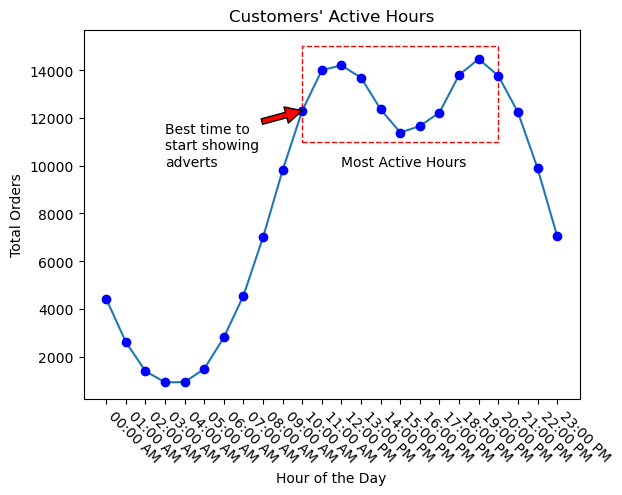

In [23]:
fig = plt.figure()

chart = fig.add_subplot(111)
chart.plot(best_sales_hours["Hour"], best_sales_hours["Quantity Ordered"])
chart.plot(best_sales_hours["Hour"], best_sales_hours["Quantity Ordered"], "bo")

chart.add_patch(
    patches.Rectangle(
        xy=(10, 11000),  # point of origin.
        width=10, height=4000, linewidth=1,
        color='red', fill=False, linestyle='--'))
chart.set_title("Customers' Active Hours")
chart.set_xlabel("Hour of the Day")
chart.set_ylabel("Total Orders")
chart.set_xticklabels(labels=best_sales_hours["Hour"], rotation=-45, ha='left')
chart.text(12, 10000, 'Most Active Hours')
chart.annotate(f'Best time to\nstart showing\nadverts', xy=(10, 12308), xytext=(3, 10000),
             arrowprops=dict(facecolor='red'),
             )
plt.show()


# <span style = 'color:violet'>Solving Question 4</span>


#### Creating a new dataframe of `Order ID` and `Product`

In [38]:
multiple_products = data[["Order ID", "Product"]]
multiple_products

,Order ID,Product
0,176558,USB-C Charging Cable
1,176559,Bose SoundSport Headphones
2,176560,Google Phone
3,176560,Wired Headphones
4,176561,Wired Headphones
...,...,...
185945,259353,AAA Batteries (4-pack)
185946,259354,iPhone
185947,259355,iPhone
185948,259356,34in Ultrawide Monitor


#### filtering only duplicated Order IDs  to find orders where customers bought multiple products

In [39]:
multiple_products = multiple_products[multiple_products.duplicated(subset='Order ID', keep=False)].sort_values(by="Order ID")
multiple_products

,Order ID,Product
67262,141275,USB-C Charging Cable
67263,141275,Wired Headphones
67279,141290,AA Batteries (4-pack)
67278,141290,Apple Airpods Headphones
67354,141365,Vareebadd Phone
...,...,...
55146,319584,Wired Headphones
55158,319596,iPhone
55159,319596,Lightning Charging Cable
55195,319631,Lightning Charging Cable


In [40]:
multiple_products["Products"] = multiple_products.groupby("Order ID", as_index=False)['Product'].transform(lambda x: ','.join(x))
multiple_products = multiple_products[["Order ID", "Products"]].drop_duplicates().reset_index(drop=True)
multiple_products

,Order ID,Products
0,141275,"USB-C Charging Cable,Wired Headphones"
1,141290,"AA Batteries (4-pack),Apple Airpods Headphones"
2,141365,"Vareebadd Phone,Wired Headphones"
3,141384,"Google Phone,USB-C Charging Cable"
4,141450,"Google Phone,Bose SoundSport Headphones"
...,...,...
7131,319536,"Macbook Pro Laptop,Wired Headphones"
7132,319556,"Google Phone,Wired Headphones"
7133,319584,"iPhone,Wired Headphones"
7134,319596,"iPhone,Lightning Charging Cable"


In [41]:
multiple_products = multiple_products.groupby("Products", as_index=False).count()
multiple_products

,Products,Order ID
0,"20in Monitor,20in Monitor",3
1,"20in Monitor,27in 4K Gaming Monitor",1
2,"20in Monitor,27in FHD Monitor",3
3,"20in Monitor,34in Ultrawide Monitor",2
4,"20in Monitor,AA Batteries (4-pack)",8
...,...,...
401,"iPhone,Vareebadd Phone,USB-C Charging Cable",1
402,"iPhone,Wired Headphones",296
403,"iPhone,Wired Headphones,Apple Airpods Headphones",2
404,"iPhone,Wired Headphones,Lightning Charging Cable",3


In [45]:
multiple_products[multiple_products["Order ID"] == multiple_products["Order ID"].max()]

,Products,Order ID
194,"Google Phone,USB-C Charging Cable",677


# <span style = 'color:violet'>Solving Question 5</span>


#### Creating a new dataframe of `Product` and `Quantity Ordered`

In [29]:
best_sell_product = data[["Product","Quantity Ordered"]]
best_sell_product

,Product,Quantity Ordered
0,USB-C Charging Cable,2
1,Bose SoundSport Headphones,1
2,Google Phone,1
3,Wired Headphones,1
4,Wired Headphones,1
...,...,...
185945,AAA Batteries (4-pack),3
185946,iPhone,1
185947,iPhone,1
185948,34in Ultrawide Monitor,1


#### Grouping by `Product` and getting total orders for each

In [30]:
best_sell_product = best_sell_product.groupby("Product", as_index=False).sum()
best_sell_product

,Product,Quantity Ordered
0,20in Monitor,4129
1,27in 4K Gaming Monitor,6244
2,27in FHD Monitor,7550
3,34in Ultrawide Monitor,6199
4,AA Batteries (4-pack),27635
5,AAA Batteries (4-pack),31017
6,Apple Airpods Headphones,15661
7,Bose SoundSport Headphones,13457
8,Flatscreen TV,4819
9,Google Phone,5532


#### Creating a bar chart out of the data

C:\Users\USER\AppData\Local\Temp\ipykernel_4148\2016200293.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(labels=best_sell_product["Product"], rotation=-45, ha='left')


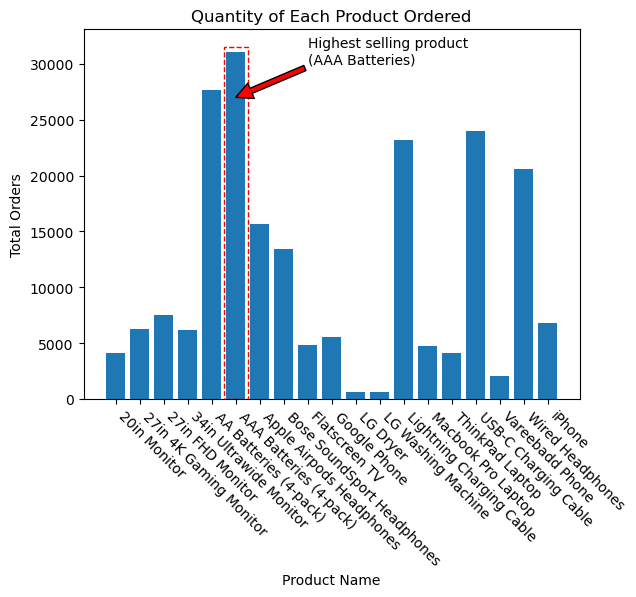

In [31]:
#plt.xticks(rotation=-45, ha="left")
fig = plt.figure()

chart = fig.add_subplot(111)
chart.bar(best_sell_product["Product"], best_sell_product["Quantity Ordered"])
chart.add_patch(
    patches.Rectangle(
        xy=(4.5, 0),  # point of origin.
        width=1, height=31500, linewidth=1,
        color='red', fill=False, linestyle='--'))
chart.set_title("Quantity of Each Product Ordered")
chart.set_xlabel("Product Name")
chart.set_ylabel("Total Orders")
chart.set_xticklabels(labels=best_sell_product["Product"], rotation=-45, ha='left')
plt.annotate(f'Highest selling product\n(AAA Batteries)', xy=(5, 27000), xytext=(8, 30000),
             arrowprops=dict(facecolor='red'),
             )
plt.show()

### Why did the AAA batteries sell the most?

Most likely because they are the more common battery types used in everyday electronics.